## Extract Kathamandu Valley from asia-latest.osm.pbf

`osmium extract --bbox 85.2776,27.6717,85.4409,27.8040 --output Kathmandu-valley.osm.pbf asia-latest.osm.pbf`


## Filter OSM datasets by tag. show amenity tag  which is not null:
`osmium tags-filter --output Kathmandu.osm.pbf Kathmandu-valley.osm.pbf amenity`



## Install Package

In [84]:

!pip install osmium
!pip install seaborn
!pip install matplotlib

## Create a Handler

In [90]:
import osmium as osm
import pandas as pd

class OSMHandler(osm.SimpleHandler):
    def __init__(self):
        osm.SimpleHandler.__init__(self)
        self.osm_data = []

    def tag_inventory(self, elem, elem_type):
        coordinates = None

        if elem_type == "node":
            coordinates = f"{elem.location.lat}/{elem.location.lon}"

        for tag in elem.tags:
            self.osm_data.append([elem_type,
                                   elem.id,
                                   elem.version,
                                   elem.visible,
                                   pd.Timestamp(elem.timestamp),
                                   elem.uid,
                                   elem.user,
                                   elem.changeset,
                                   len(elem.tags),
                                   coordinates,
                                   tag.k,
                                   tag.v])

    def node(self, n):
        self.tag_inventory(n, "node")

    def way(self, w):
        self.tag_inventory(w, "way")

    def relation(self, r):
        self.tag_inventory(r, "relation")

osmhandler = OSMHandler()
# scan the input file and fill the handler list accordingly
osmhandler.apply_file("Kathmandu.osm.pbf")

# transform the list into a pandas DataFrame
data_colnames = ['type', 'id', 'version', 'visible', 'ts', 'uid',
                 'user', 'chgset', 'ntags', 'coordinates', 'tagkey', 'tagvalue']

# create Dataframe(df)
df_osm = pd.DataFrame(osmhandler.osm_data, columns=data_colnames)

# Corrected line to sort the DataFrame
df_osm = df_osm.sort_values(by=['type', 'id', 'ts'])


In [123]:
#show top 10 dataframe
df_osm.head(10)

,type,id,version,visible,ts,uid,user,chgset,ntags,coordinates,tagkey,tagvalue,is_duplicate
0,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,27.7353517/85.3057238,amenity,bus_station,False
1,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,27.7353517/85.3057238,name,Macha Pokhari Bus Station,False
2,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,27.7353517/85.3057238,name:en,"Pasang Lhamu Ticket Counter - Trishuli, Dhunch...",False
3,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,27.7353517/85.3057238,opening_hours,Mo-Su 05:00-18:00,False
4,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,27.7353517/85.3057238,phone,014356342,False
5,node,279376624,4,True,2017-03-09 04:41:46+00:00,0,,0,4,27.7067985/85.314477,amenity,bus_station,False
6,node,279376624,4,True,2017-03-09 04:41:46+00:00,0,,0,4,27.7067985/85.314477,created_by,Potlatch 0.10f,False
7,node,279376624,4,True,2017-03-09 04:41:46+00:00,0,,0,4,27.7067985/85.314477,name:en,Ratna Park bus station,False
8,node,279376624,4,True,2017-03-09 04:41:46+00:00,0,,0,4,27.7067985/85.314477,name:zh,去巴德岗，去帕坦,False
9,node,279376643,1,True,2008-07-18 22:00:52+00:00,0,,0,2,27.7158423/85.2892175,amenity,place_of_worship,False


### Check Row and Column

In [92]:
df_osm.shape
#(row,column)

(59745, 12)

### Check Duplicates rows.

- Add `is_duplicate` column as a duplicate flag.

In [93]:
df_osm['is_duplicate'] = df_osm.duplicated(['type', 'id','tagkey','tagvalue'], keep=False)
df_osm.head(10)


,type,id,version,visible,ts,uid,user,chgset,ntags,coordinates,tagkey,tagvalue,is_duplicate
0,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,27.7353517/85.3057238,amenity,bus_station,False
1,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,27.7353517/85.3057238,name,Macha Pokhari Bus Station,False
2,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,27.7353517/85.3057238,name:en,"Pasang Lhamu Ticket Counter - Trishuli, Dhunch...",False
3,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,27.7353517/85.3057238,opening_hours,Mo-Su 05:00-18:00,False
4,node,268310351,10,True,2023-05-25 10:02:57+00:00,0,,0,5,27.7353517/85.3057238,phone,014356342,False
5,node,279376624,4,True,2017-03-09 04:41:46+00:00,0,,0,4,27.7067985/85.314477,amenity,bus_station,False
6,node,279376624,4,True,2017-03-09 04:41:46+00:00,0,,0,4,27.7067985/85.314477,created_by,Potlatch 0.10f,False
7,node,279376624,4,True,2017-03-09 04:41:46+00:00,0,,0,4,27.7067985/85.314477,name:en,Ratna Park bus station,False
8,node,279376624,4,True,2017-03-09 04:41:46+00:00,0,,0,4,27.7067985/85.314477,name:zh,去巴德岗，去帕坦,False
9,node,279376643,1,True,2008-07-18 22:00:52+00:00,0,,0,2,27.7158423/85.2892175,amenity,place_of_worship,False


On the basis of type, id column there is multiple duplicate which later will be handled by pivoting the data frame. For now, there is no duplicates as for required column.

### Show tagkey column value with each count

In [94]:

tagkey_counts = df_osm['tagkey'].value_counts()
# Print the top 20 values
print(tagkey_counts.head(20))


amenity               13472
name                  10101
name:en                3174
source                 2365
name:ne                1602
operator:type          1559
addr:street            1534
building_count         1532
personnel:count        1508
phone                  1401
isced:level            1327
student:count          1316
operator               1081
building               1063
opening_hours           968
religion                928
addr:city               682
wheelchair              592
cuisine                 483
toilets:wheelchair      427
Name: tagkey, dtype: int64


### Copy the highest value and some selective value for analysis to new df

In [95]:
# df_osm is the original DataFrame
df = df_osm[df_osm['tagkey'].isin(['amenity', 'name','name:ne','name:en', 'source','capacity'])].copy()

# Display the  DataFrame
df.sample(10)


,type,id,version,visible,ts,uid,user,chgset,ntags,coordinates,tagkey,tagvalue,is_duplicate
24564,node,9942141117,1,True,2022-08-09 09:49:47+00:00,0,,0,2,27.6730332/85.3243908,amenity,cafe,False
50747,way,225594252,7,True,2013-10-18 08:50:39+00:00,0,,0,31,None,amenity,school,False
54330,way,245075713,2,True,2014-05-19 11:58:40+00:00,0,,0,3,None,name,Be There,False
19081,node,7088157087,3,True,2023-03-22 10:59:19+00:00,0,,0,4,27.7161811/85.3459386,name:en,Shree Pashupati Secondary School,False
4428,node,2168874678,7,True,2023-06-15 09:50:37+00:00,0,,0,5,27.7270135/85.3548968,name:ne,सरस्वती मन्दिर,False
58929,way,1125359900,2,True,2022-12-29 09:04:23+00:00,0,,0,4,None,amenity,motorcycle_parking,False
48133,way,223275407,4,True,2013-08-26 10:21:35+00:00,0,,0,8,None,source,OpenDRI survey,False
54789,way,313548989,2,True,2021-02-15 06:42:56+00:00,0,,0,5,None,amenity,parking,False
8678,node,4264083856,4,True,2023-06-08 11:23:35+00:00,0,,0,5,27.6984576/85.3311776,name:en,Mandir,False
22863,node,9529746968,2,True,2023-07-08 14:33:06+00:00,0,,0,3,27.7021793/85.310755,amenity,bank,False


### Pivot the DataFrame
- onvert `tagkey` row to Column with `tagvalue` assign with it.
- Select Some name value as for analysis.

In [96]:
pivoted_df = df.pivot_table(index=['type', 'id', 'version', 'visible', 'ts', 'uid', 'coordinates', 'chgset', 'ntags'],
                                            columns='tagkey', values='tagvalue', aggfunc='first').reset_index()

# Display the pivoted DataFrame
pivoted_df.sample(10)

tagkey,type,id,version,visible,ts,uid,coordinates,chgset,ntags,amenity,capacity,name,name:en,name:ne,source
3569,node,4753802823,2,True,2017-12-30 17:27:13+00:00,0,27.7348577/85.3096909,0,2,bus_station,NaN,NaN,Bus to Pokhara #bor,NaN,NaN
9438,node,10048819945,1,True,2022-09-24 10:24:51+00:00,0,27.6850951/85.3664544,0,2,pharmacy,NaN,Zenith Pharmacy,NaN,NaN,NaN
6860,node,9599541321,1,True,2022-03-23 11:34:31+00:00,0,27.7023503/85.3597167,0,5,toilets,NaN,NaN,NaN,NaN,NaN
6073,node,8806897302,3,True,2023-06-15 09:50:37+00:00,0,27.7059925/85.2974063,0,4,water_point,NaN,चागलधारा,Chagal Dhara,चागलधारा,NaN
6617,node,9528551017,2,True,2022-09-11 19:12:33+00:00,0,27.7413604/85.3299974,0,2,restaurant,NaN,CFC THE AIRPORT SEKUWA CORNER,NaN,NaN,NaN
137,node,1498876026,4,True,2020-03-30 10:51:33+00:00,0,27.6961409/85.3080938,0,2,cafe,NaN,Bakery Cafe Teku,NaN,NaN,NaN
3630,node,4763981721,3,True,2023-03-22 10:47:02+00:00,0,27.7053643/85.3122083,0,6,place_of_worship,NaN,गणेश मन्दिर,Ganesh Temple,गणेश मन्दिर,NaN
602,node,1937721989,1,True,2012-09-29 09:28:13+00:00,0,27.6728786/85.3179075,0,2,ngo,NaN,Non-governmental Organization Nepal,NaN,NaN,NaN
1028,node,2074412129,3,True,2015-07-17 06:44:08+00:00,0,27.7260665/85.3233732,0,2,atm,NaN,NaN,NaN,NaN,NaN
8273,node,10011219686,1,True,2022-09-09 12:03:18+00:00,0,27.7354667/85.3079795,0,2,bar,NaN,Fulchoki Dance Bar,NaN,NaN,NaN


### Merge the Column


- Merge `name`, `name:en,` `name:ne` to single column `name`
- And drop that existing column.

In [97]:
pivoted_df['name'] = pivoted_df['name'].fillna(pivoted_df['name:en']).fillna(pivoted_df['name:ne'])

# Drop 'name:en' and 'name:ne' columns
pivoted_df.drop(['name:en', 'name:ne'], axis=1, inplace=True)
pivoted_df.sample(10)


tagkey,type,id,version,visible,ts,uid,coordinates,chgset,ntags,amenity,capacity,name,source
8979,node,10016425399,1,True,2022-09-11 18:22:10+00:00,0,27.7494371/85.3361572,0,2,restaurant,NaN,Gaule Khaja Ghar,NaN
10376,node,10611337612,2,True,2023-06-29 05:56:08+00:00,0,27.7077741/85.3833034,0,2,community_centre,NaN,Jestha Nagharik Building,NaN
8485,node,10013011010,1,True,2022-09-10 10:37:02+00:00,0,27.7380743/85.3096627,0,2,restaurant,NaN,Dhangadhi kanchanpur khaja Ghar,NaN
3855,node,4834152622,1,True,2017-05-04 08:01:05+00:00,0,27.7393761/85.3365784,0,3,bus_station,NaN,Chakrapath,NaN
2911,node,4329327889,1,True,2016-07-31 11:32:24+00:00,0,27.6728835/85.3245667,0,2,cafe,NaN,Dani's Handmade Coffee,NaN
685,node,1962367558,2,True,2023-03-22 11:13:56+00:00,0,27.7178482/85.3363133,0,5,place_of_worship,NaN,हाडिगाउँ भुटेश्वर मन्दिर,NaN
3311,node,4577903489,1,True,2016-12-28 17:54:09+00:00,0,27.7250073/85.31523,0,3,fast_food,NaN,NaN,NaN
4900,node,5995392686,1,True,2018-10-18 12:15:20+00:00,0,27.7206299/85.361395,0,1,bureau_de_change,NaN,NaN,NaN
3572,node,4754370527,1,True,2017-03-25 11:44:29+00:00,0,27.678172/85.3152943,0,2,restaurant,NaN,Minas Bhojanalaya,NaN
8188,node,10010484025,1,True,2022-09-09 05:16:29+00:00,0,27.7367479/85.3224118,0,2,restaurant,NaN,Lumbini Tandoori Dawa And Bhojanalaya,NaN


## Now Check Data type of each column:

In [98]:
pivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10702 entries, 0 to 10701
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   type         10702 non-null  object             
 1   id           10702 non-null  int64              
 2   version      10702 non-null  int64              
 3   visible      10702 non-null  bool               
 4   ts           10702 non-null  datetime64[ns, UTC]
 5   uid          10702 non-null  int64              
 6   coordinates  10702 non-null  object             
 7   chgset       10702 non-null  int64              
 8   ntags        10702 non-null  int64              
 9   amenity      10193 non-null  object             
 10  capacity     37 non-null     object             
 11  name         8743 non-null   object             
 12  source       768 non-null    object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(5), object(6)
memory usage: 1013.9

### Handle `capacity` column.

The `capacity` column is expected to contain integer values, But First:

- We need to inspect its unique values and address any inconsistencies in the data.


In [99]:
capacities = pivoted_df['capacity'].unique()
print(capacities)

[nan '0' '100' '20' '30' '150' '50' '35-40' '200' '25' '60' '100 plus'
 '15' '35' '10' '40' '86' '7' '600' '15 cars and 40 bikes' '40-50']


- Handle string, null value and convert it to int type.

In [100]:

pivoted_df['capacity'] = pivoted_df['capacity'].replace('100 plus', 100)
pivoted_df['capacity'] = pivoted_df['capacity'].replace('15 cars and 40 bikes',40)
pivoted_df['capacity'] = pivoted_df['capacity'].replace('40-50',50)


#  convert it to numeric
pivoted_df['capacity'] = pd.to_numeric(pivoted_df['capacity'], errors='coerce')

# Specify a default value for NaN (replace NaN with 0)
pivoted_df['capacity'] = pivoted_df['capacity'].fillna(0).astype(int)


capacities = pivoted_df['capacity'].unique()

#check unique
print(capacities)

#check the capacity column data type
print(pivoted_df['capacity'].dtype)

[  0 100  20  30 150  50 200  25  60  15  35  10  40  86   7 600]
int64


### Handle `amenity` column.

Check any inconsistent value in `amenity`  column.

- We inspect its unique values and address any inconsistencies in the data.

In [101]:
unique_amenities = pivoted_df['amenity'].unique()
print(unique_amenities)

['bus_station' 'place_of_worship' 'restaurant' 'marketplace' 'bank'
 'bicycle_rental' 'cafe' 'parking' 'school' 'fast_food' 'pharmacy'
 'health_post' 'police' 'fuel' 'post_office' 'atm' 'hospital' 'toilets'
 'festival_grounds' 'dentist' 'taxi' nan 'cinema' 'social_facility'
 'drinking_water' 'kindergarten' 'townhall' 'clinic' 'public_building'
 'bench' 'driving_school' 'community_centre' 'library' 'theatre' 'bar'
 'nursing_home' 'bureau_de_change' 'studio' 'crematorium' 'arts_centre'
 'pub' 'social_center' 'courthouse' 'cargo' 'college' 'doctors' 'car_wash'
 'parking_space' 'post_box' 'office' 'veterinary' 'doctors;clinic'
 'office;restaurant' 'ngo' 'recycling' 'fountain' 'events_venue' 'rental'
 'money_transfer' 'nightclub' 'hunting_stand' 'ice_cream' 'commercial'
 'tailor' 'waste_disposal' 'bbq' 'shelter' 'internet_cafe'
 'educational institution' 'telephone' 'remittance' 'waste_basket'
 'dancing_school' 'language_school' 'Ashram' 'shop' 'motorcycle_parking'
 'water_point' 'universit

There is `office;restaurant` , `doctors;clinic`, `toilets;bank` values in `amenity` which are inconsistent.

- Address the inconsistent values by splitting them.

In [102]:
pivoted_df['amenity'] = pivoted_df['amenity'].apply(lambda x: x.split(';')[0] if pd.notna(x) else x)
unique_amenities = pivoted_df['amenity'].unique()
print(unique_amenities)

['bus_station' 'place_of_worship' 'restaurant' 'marketplace' 'bank'
 'bicycle_rental' 'cafe' 'parking' 'school' 'fast_food' 'pharmacy'
 'health_post' 'police' 'fuel' 'post_office' 'atm' 'hospital' 'toilets'
 'festival_grounds' 'dentist' 'taxi' nan 'cinema' 'social_facility'
 'drinking_water' 'kindergarten' 'townhall' 'clinic' 'public_building'
 'bench' 'driving_school' 'community_centre' 'library' 'theatre' 'bar'
 'nursing_home' 'bureau_de_change' 'studio' 'crematorium' 'arts_centre'
 'pub' 'social_center' 'courthouse' 'cargo' 'college' 'doctors' 'car_wash'
 'parking_space' 'post_box' 'office' 'veterinary' 'ngo' 'recycling'
 'fountain' 'events_venue' 'rental' 'money_transfer' 'nightclub'
 'hunting_stand' 'ice_cream' 'commercial' 'tailor' 'waste_disposal' 'bbq'
 'shelter' 'internet_cafe' 'educational institution' 'telephone'
 'remittance' 'waste_basket' 'dancing_school' 'language_school' 'Ashram'
 'shop' 'motorcycle_parking' 'water_point' 'university' 'car_rental'
 'immigration border' 

Check any duplicates rows incase:
* No duplicates found!

In [103]:
pivoted_df[pivoted_df.duplicated(subset=['id','type'], keep=False)]


tagkey,type,id,version,visible,ts,uid,coordinates,chgset,ntags,amenity,capacity,name,source


## Check the null value

In [104]:
pivoted_df.isnull().sum()

tagkey
type              0
id                0
version           0
visible           0
ts                0
uid               0
coordinates       0
chgset            0
ntags             0
amenity         509
capacity          0
name           1959
source         9934
dtype: int64

There are 3 columns (`amenity`,`name`,`source`) which consists null values. We handle this one by one.

### Check `amenity` Value.

- Show null value.

In [105]:
pivoted_df[pivoted_df['amenity'].isnull()]

tagkey,type,id,version,visible,ts,uid,coordinates,chgset,ntags,amenity,capacity,name,source
68,node,1280126483,4,True,2018-11-22 03:50:13+00:00,0,27.7044442/85.3506388,0,1,NaN,0,NaN,OpenDRI survey
87,node,1383965534,9,True,2021-08-24 04:25:42+00:00,0,27.6900252/85.3187299,0,1,NaN,0,NaN,OpenDRI survey
88,node,1383965536,9,True,2021-08-24 04:25:42+00:00,0,27.6904432/85.3191966,0,1,NaN,0,NaN,OpenDRI survey
89,node,1383965539,10,True,2021-08-24 04:25:42+00:00,0,27.6898506/85.3196673,0,1,NaN,0,NaN,OpenDRI survey
90,node,1383965540,9,True,2021-08-24 04:25:42+00:00,0,27.6902674/85.3189404,0,1,NaN,0,NaN,OpenDRI survey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,node,10053133622,1,True,2022-09-26 08:35:21+00:00,0,27.6734989/85.385437,0,2,NaN,0,Kolkata Sweets,NaN
9562,node,10053133625,1,True,2022-09-26 08:35:21+00:00,0,27.6734961/85.3854894,0,3,NaN,0,Madhyapur furnishing Center,NaN
9566,node,10053133634,1,True,2022-09-26 08:35:21+00:00,0,27.6736713/85.3854006,0,2,NaN,0,S.B Store,NaN
9567,node,10053133636,1,True,2022-09-26 08:35:21+00:00,0,27.6735578/85.385393,0,3,NaN,0,Lonely Liqours Shop,NaN


- Drop the null value.

In [106]:
pivoted_df.dropna(subset=['amenity'], inplace=True)

#check the null value
pivoted_df['amenity'].isnull().sum()

0

### Check `source`  and `name` value.

- Handle Null by filling `-` Value.

In [107]:
pivoted_df['name'].fillna('-', inplace=True)
pivoted_df['source'].fillna('-', inplace=True)

#check the total null value
pivoted_df.isnull().sum()


tagkey
type           0
id             0
version        0
visible        0
ts             0
uid            0
coordinates    0
chgset         0
ntags          0
amenity        0
capacity       0
name           0
source         0
dtype: int64

## Rename and Rearrange the Column names.

In [108]:
# create order list
new_column_order = ['element_type', 'element_id', 'element_version', 'is_visible',
                    'timestamp', 'user_id', 'coordinates', 'num_tags', 'amenity_type',
                    'amenity_name', 'changeset', 'capacity_value', 'data_source']

# Create a dictionary to map old column names to new names
column_mapping = {
    'type': 'element_type',
    'id': 'element_id',
    'version': 'element_version',
    'visible': 'is_visible',
    'ts': 'timestamp',
    'uid': 'user_id',
    'coordinates': 'coordinates',
    'chgset': 'changeset',
    'ntags': 'num_tags',
    'amenity': 'amenity_type',
    'capacity': 'capacity_value',
    'name': 'amenity_name',
    'source': 'data_source'
}

# Rename columns
pivoted_df = pivoted_df.rename(columns=column_mapping)

# Reorder columns
df = pivoted_df[new_column_order]

#print the column
print(df.columns)

Index(['element_type', 'element_id', 'element_version', 'is_visible',
       'timestamp', 'user_id', 'coordinates', 'num_tags', 'amenity_type',
       'amenity_name', 'changeset', 'capacity_value', 'data_source'],
      dtype='object', name='tagkey')


In [109]:
df.sample(10)

tagkey,element_type,element_id,element_version,is_visible,timestamp,user_id,coordinates,num_tags,amenity_type,amenity_name,changeset,capacity_value,data_source
7850,node,9999145646,1,True,2022-09-04 08:21:55+00:00,0,27.672431/85.3551668,2,restaurant,Gurung Khaja Ghar,0,0,-
7800,node,9969484886,3,True,2023-06-15 09:50:37+00:00,0,27.703358/85.3179891,4,restaurant,नयाँ बिशाल मोमो केन्द्र,0,0,-
10404,node,10617740507,1,True,2023-02-08 08:47:39+00:00,0,27.7012818/85.3791281,3,bureau_de_change,City Express Money Transfer,0,0,-
3394,node,4631658990,2,True,2022-02-23 12:06:54+00:00,0,27.7026635/85.3108679,2,atm,-,0,0,-
10360,node,10608004906,1,True,2023-02-05 13:25:32+00:00,0,27.735598/85.3055485,2,restaurant,The Burger House & Crunchy Fried Chicken,0,0,-
5727,node,7817081585,3,True,2023-03-25 04:43:32+00:00,0,27.7417758/85.3223044,5,school,ए.पि.एस. स्कुल,0,0,-
1067,node,2079583996,3,True,2015-07-17 06:43:12+00:00,0,27.7354371/85.3212593,2,fast_food,Neelam Khana Ra Khaja Ghar,0,0,-
2070,node,2628358572,3,True,2022-02-10 06:02:18+00:00,0,27.7059004/85.3143816,2,toilets,-,0,0,-
9493,node,10050505455,1,True,2022-09-25 08:19:44+00:00,0,27.6823072/85.3742181,3,bank,Rastriya Banijya Bank,0,0,-
5286,node,6332611723,3,True,2023-03-25 14:52:01+00:00,0,27.7541849/85.3683051,5,place_of_worship,चुनिखेल मन्दिर,0,0,-


In amenity_name Column there is a language difference which is Nepali and English.

### Translate `name` from Nepali to English

- Extract Nepali Language from `name` column to list.

In [112]:
import re

# Pattern to match non-English characters (Nepali/Hindi)
Nepali_pattern = re.compile(r'[^\u0000-\u007F]+')

# Filter rows where 'amenity_name' contains non-English characters
Nepali_rows = df[df['amenity_name'].str.contains(Nepali_pattern, na=False)]

# Store the 'amenity_name' values in a list
Nepali_list = Nepali_rows['amenity_name'].tolist()

# Count the list
print(len(Nepali_list))


1583


- Select Unique from the list

In [113]:
unique_nepali_list = list(set(Nepali_list))

# Print the unique Hindi values
print(len(unique_nepali_list))
print(unique_nepali_list)


1410
['जलख्या', 'एभरेस्ट तन्दुरी धावा', 'श्री बाल बयाबासाये केन्द्र माध्यमिक विद्यालय', 'स्थानीय रेस्ट्रो र बार', 'Dé Temple Cafe', 'नेपाल इन्भेष्टमेन्ट बैंकको एटीएम', 'लखै हाउस', 'Sanima Bank सानीमा बैंक', 'ओम रुद्रेशोव्र मन्दिर', 'सन्ध्या खाजा घर', 'नेपाल इन्भेष्टमे्ण्ट मेगा बैंक लि.', 'रक्ताकाली मन्दिर', 'हिमालयन ब्रु कफी', 'क्यास्पियन कलेज', 'नेपाल राष्ट्र बैंक', 'फाएर एण्ड आइस रेष्टुरेन्ट', 'दशैं घर', 'सन्धरा शिव मन्दिर', 'एसआरएल डायग्नोस्टिक', 'अमूल आयुर्वेद सेवा केन्द्र प्रा. लि', 'टेकु डोभान', 'ब्ल्याक हक कलेज अफ कम्प्युटर स्टडीज', 'महाबीर दाइको रेस्टुरेन्ट', 'भवानी मन्दिर', 'नेवा क्याफे एण्ड फास्टफूड', 'राम्रो खाना क्याफे', 'सुब्बा मेडिकल सेन्टर प्रा. लि', 'चा: माटी ड्राइभिङ स्कुल', 'नेचर केयर अस्पताल', 'शिला राष्ट्रिय औषधि तथा पथ प्रा. लि', 'आधारशिला विद्यालय', 'पञ्चायन आकाशीय विद्यालय', 'व्हाइट फिल्ड स्कूल', 'चुनदेवी मन्दिर', 'नागार्जुन भ्याली स्कुल', 'मोमो स्टार', 'न्यूयोर्क शैलीको पिज्जा', 'ग्रेटर नेपाल रेष्टुरेन्ट', 'काथेसिम्बु स्तूपा', 'इको लाउन्ज', 'हिमाली आवासीय विद्या

- Install translator library

In [114]:
!pip install -U deep-translator

- Translate Nepali to English List



> Note: The execution time for the process ranges from 3 to 10 minutes.



In [115]:
from deep_translator import GoogleTranslator


# Use GoogleTranslator to translate each text in the list
translations_to_english = [GoogleTranslator(source='auto', target='en').translate(text) for text in unique_nepali_list]

# Print the translations
print(translations_to_english)


['Jalakhya', 'Everest Tandoori Rush', 'Shri Bal Byabasaye Center Secondary School', 'Local restaurants and bars', 'Dé Temple Cafe', 'Nepal Investment Bank ATM', 'Lakhai House', 'Sanima Bank Sanima Bank', 'Om Rudreshovra Temple', 'Sandhya Khaja House', 'Nepal Investment Mega Bank Ltd.', 'Raktakali Temple', 'Himalayan Brew Coffee', 'Caspian College', 'Nepal Rastra Bank', 'Fire and Ice Restaurant', 'Dashain house', 'Sandhara Shiva Temple', 'SRL Diagnostic', 'Amul Ayurved Seva Kendra Pvt. ltd', 'Teku Dovan', 'Black Hawk College of Computer Studies', "Mahabir Dai's Restaurant", 'Bhavani Temple', 'Neva Cafe and Fast Food', 'Good food cafe', 'Subba Medical Center Pvt. Ltd', 'Cha: Mati Driving School', 'Nature Care Hospital', 'Shila National Drug and Path Pvt. ltd', 'Cornerstone School', 'Panchayan Akashiya Vidyalaya', 'White Field School', 'Chundevi Temple', 'Nagarjuna Bhayali School', 'momo star', 'New York style pizza', 'Greater Nepal Restaurant', 'Kathesimbu Stupa', 'Echo Lounge', 'Himali 

- Replace the Nepali list with its corresponding English list in the `name` column dataframe.

In [116]:
df['amenity_name']=df['amenity_name'].replace(unique_nepali_list,translations_to_english)

In [117]:
#display the data
df.sample(10)

tagkey,element_type,element_id,element_version,is_visible,timestamp,user_id,coordinates,num_tags,amenity_type,amenity_name,changeset,capacity_value,data_source
7807,node,9974264435,1,True,2022-08-24 07:16:46+00:00,0,27.6735258/85.3564264,2,events_venue,Indrasan Banquet and Restaurant,0,0,-
5376,node,6501663544,2,True,2023-04-26 09:22:47+00:00,0,27.7162741/85.427897,3,place_of_worship,Shiv Temple,0,0,-
6686,node,9528662619,1,True,2022-02-23 02:12:21+00:00,0,27.7173785/85.346268,2,dentist,Omkar Dental home,0,0,-
7362,node,9942220322,1,True,2022-08-09 10:47:30+00:00,0,27.6739843/85.3249383,5,restaurant,NewaribKitchen,0,0,-
10485,node,10803756805,1,True,2023-04-12 06:18:12+00:00,0,27.7151342/85.3127303,2,fast_food,Western Tandoori,0,0,-
3946,node,4908201926,1,True,2017-06-10 22:48:38+00:00,0,27.7007034/85.3082523,2,drinking_water,S.S. Water Supply,0,0,-
8724,node,10015291520,1,True,2022-09-11 08:00:55+00:00,0,27.740472/85.3262838,2,restaurant,SUJAN FAST FOOD,0,0,-
6098,node,8829801142,1,True,2021-06-13 16:17:36+00:00,0,27.6734527/85.4186831,2,water_point,-,0,0,-
6747,node,9529746997,1,True,2022-02-23 12:06:54+00:00,0,27.7029036/85.310924,2,bank,Mega Bank Nepal Limited,0,0,-
4715,node,5686874522,1,True,2018-06-13 06:56:38+00:00,0,27.7688298/85.2983395,2,school,Guiness public,0,0,-


### Store in the CSV File

In [124]:
df.to_csv('Kathmandu_OSM.csv', index=False)


## Plot the Amenity_type column by Numbers

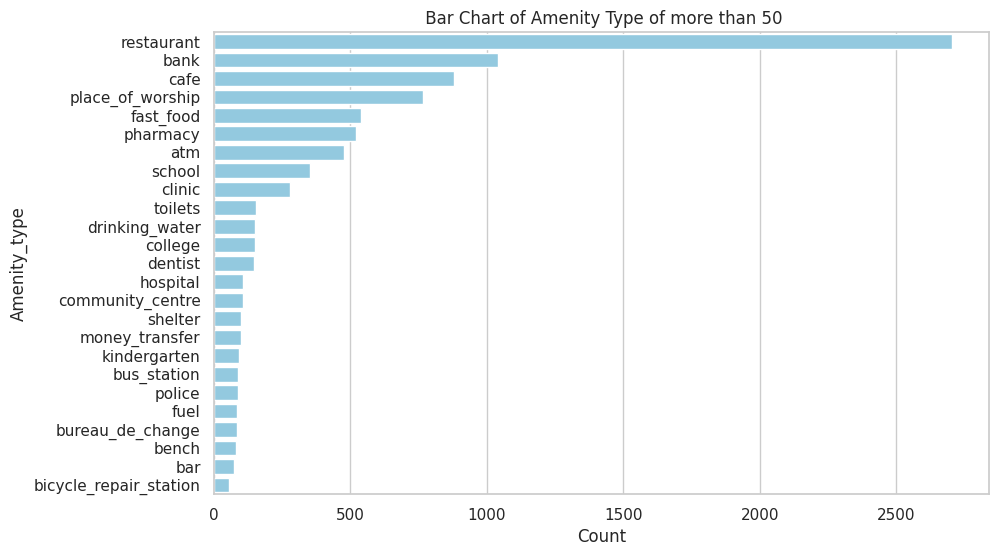

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt


# Get value counts for amenities
amenity_counts = df['amenity_type'].value_counts()

# Filter amenities with counts greater than 50
filtered_amenities = amenity_counts[amenity_counts > 50]

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create a horizontal bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_amenities.values, y=filtered_amenities.index, color='skyblue')
plt.title(' Bar Chart of Amenity Type of more than 50')
plt.xlabel('Count')
plt.ylabel('Amenity_type')
plt.show()


Restaurant is Highest, Now plot in the map.

## For Visualizing Geospatial Data

- Install folium package

In [120]:
!pip install folium


- Create an interactive Folium map with markers for locations that match the specified amenity_types column

In [121]:
import folium
from folium.plugins import MarkerCluster

# Example types
types = ['restaurant']

# Filter rows where 'amenity_type' is in the specified types and 'coordinates' is not null
filtered_data = df[(df['amenity_type'].isin(types)) & df['coordinates'].notna()]

# Extract latitude and longitude from the 'coordinates' column
coordinates_split = filtered_data['coordinates'].str.split('/', expand=True).astype(float)
filtered_data['latitude'] = coordinates_split[0]
filtered_data['longitude'] = coordinates_split[1]

# Create a map centered around the first location
if not filtered_data.empty:
    map_center = [filtered_data['latitude'].iloc[0], filtered_data['longitude'].iloc[0]]
    map_osm = folium.Map(location=map_center, zoom_start=12)

    # Create a MarkerCluster layer for better visualization if there are multiple points
    marker_cluster = MarkerCluster().add_to(map_osm)

    # Add markers for each location
    for index, row in filtered_data.iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
        ).add_to(marker_cluster)

else:
    print("No data for specified types with valid coordinates.")


<ipython-input-121-97e876a6209a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['latitude'] = coordinates_split[0]
<ipython-input-121-97e876a6209a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['longitude'] = coordinates_split[1]


In [122]:
#display map
map_osm